In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [3]:
data = data.drop(columns=['Index'])
data = data.dropna()
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
print(data.shape)

(30, 2)


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score: 0.9024461774180497


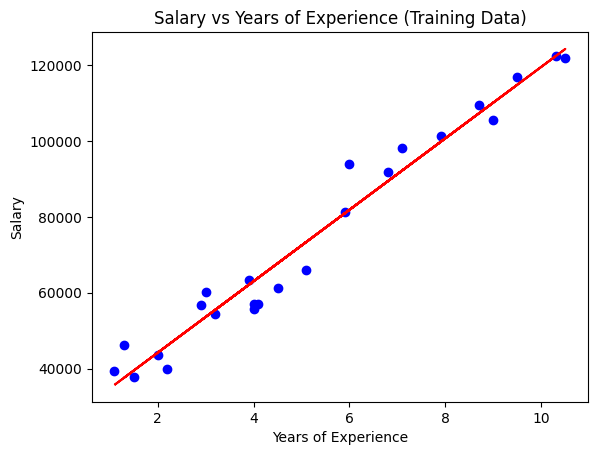

In [9]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title("Salary vs Years of Experience (Training Data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

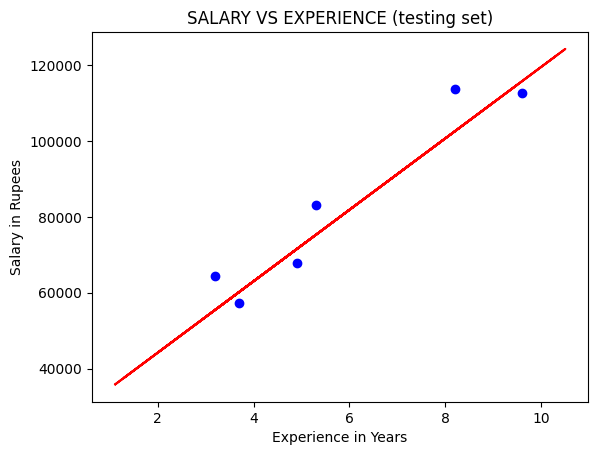

In [10]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('SALARY VS EXPERIENCE (testing set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()